Stacking**


## Датасет: forest_covertype.csv


1.   Загрузить данные
2.   Удалить выбросы и дубликаты
3.   Проверить зависимость признаков.
4.   Удалить признаки с высокой зависимостью.
5.   Закодировать признаки с типом object
6.   Разделить данные на признаки и целевую переменную
7.   Разделить на подвыборки для обучения и тестовую
8.   Создать стэк моделей RandomForestClassifier
9.   Обучить классификатор
10.   Найти значение RocAUC


Условия прохождения теста: RocAUC >=0.85

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

In [10]:
# Шаг 1: Загрузить данные
data = pd.read_csv('forest_covertype.csv')

In [11]:
# Шаг 2: Удалить выбросы и дубликаты
# Удаление дубликатов
data = data.drop_duplicates()

In [12]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [15]:
from sklearn.metrics import roc_auc_score

# Прогнозирование вероятностей
y_pred_proba = model.predict_proba(X_test)  # Это уже многомерный массив

# Вычисление RocAUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # или 'ovo'
print(f'RocAUC: {roc_auc}')

RocAUC: 0.9820818624729736


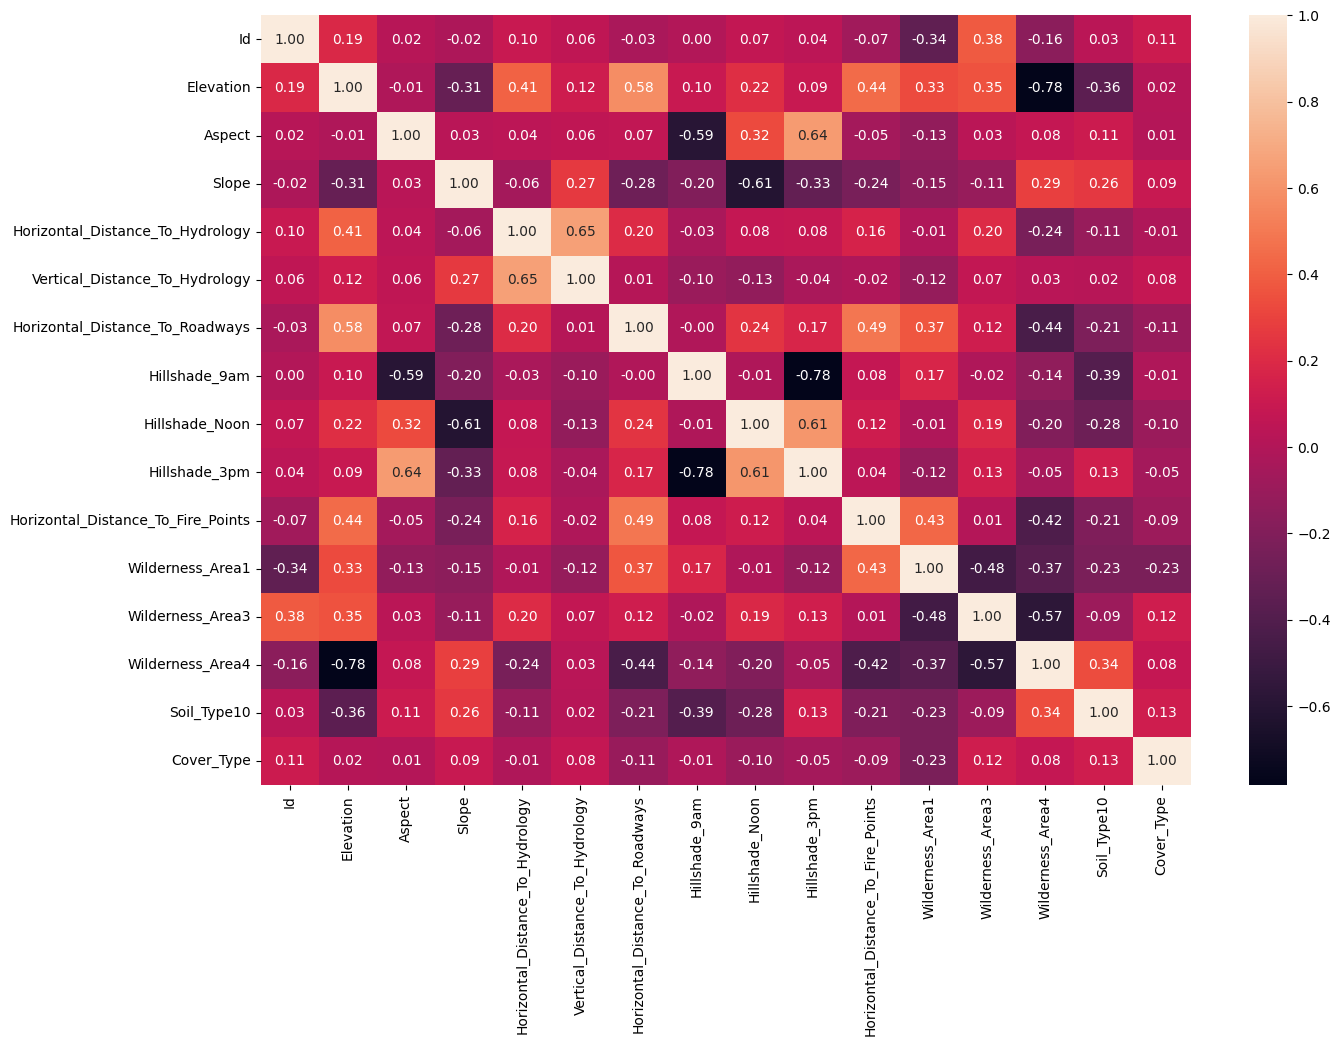

In [17]:
# Шаг 2: Проверить зависимость признаков
correlation_matrix = data.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [18]:
# Шаг 3: Удалить признаки с высокой зависимостью
threshold = 0.9
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr = [(x, y) for x, y in corr_pairs.index if x != y and abs(corr_pairs[x, y]) > threshold]

# Удаляем высокозависимые признаки (оставляя один из пары)
to_drop = set()
for x, y in high_corr:
    to_drop.add(y)

data = data.drop(columns=to_drop)

In [19]:
# Шаг 4: Закодировать признаки с типом object (если есть)


# Шаг 5: Разделить данные на признаки и целевую переменную
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

In [20]:
# Шаг 6: Разделить на подвыборки для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 7: Создать стэк моделей RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Шаг 8: Обучить классификатор
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Шаг 9: Найти значение RocAUC
y_pred_proba = model.predict_proba(X_test)
# Для многоклассовой классификации используем average='macro'
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f'RocAUC: {roc_auc}')

# Условие прохождения теста
if roc_auc >= 0.85:
    print("Условие прохождения теста выполнено.")
else:
    print("Условие прохождения теста не выполнено.")

RocAUC: 0.985936463893554
Условие прохождения теста выполнено.
